# GANS


## Intro

A Generative Adversarial Network (GAN) is a deep learning technique used for generating new data similar to existing data. It consists of two neural networks:

1. Generator: The generator goal is to learn how to generate sysnthectic data. We say the generator learns the data distribution
1. Discriminator: The discriminator goals is to distinguish between real data and the synsthetic data


The NN are trained in a way that the Generator try to fools the Discriminator to label the data produced by the Generator as real. The Discriminator tries to correctly label the Generator output as fake (synthetic data). At the begining of training both NN commit a lot of error since they are still learning. But up to certain point, the quality of the output of the Generator increase and also the Discriminator becomes better and hard to be fooled.

GANs has many applications in the industry:

1. Image, Video and audio generations: application on social media, advertisemenst and entertainment industry. Widely used in social media  

1. Data augmentation: Help training other Machine learnings models. Many task that utilizes GANs for increase the the data size of the minority classes acheive SOTA performance. Ex:

    * CIFAR-10: paper "Improved Training of Wasserstein GANs," Arjovsky et al. (2017) and "BigGAN: Large Scale GAN Training for High Fidelity Natural Image Synthesis," Brock et al. (2018) 

    * Medical imaging: "Adversarial deep structured nets for mass segmentation from mammograms" by Li et al. (2019), Synthesizing medical images for augmented reality training data using generative adversarial networks" by Yang et al. (2018)  and "Improving medical image segmentation via adversarial training and perceptual similarity metrics" by Zhang et al. (2018)

1. Anomaly detection: Achieve SOTA performance 

    * Credit Card Fraud Detection
    * paper "Generating Synthetic Tabular Data using Generative Adversarial Networks," Wang et al. (2019) 
    

1. Outlier detection: 

    * "AnoGAN: Unsupervised Anomaly Detection with Generative Adversarial Networks to Guide Marker Discovery" by Schlegl et al. (2017) - This paper introduces the AnoGAN approach, which uses a GAN to learn the normal data distribution and a distance metric to detect outliers (SOTA in many images dataset).
    
    * "MAD-GAN: Multivariate Anomaly Detection for Time Series Data with Generative Adversarial Networks" by Li et al. (2019) - This paper introduces the MAD-GAN approach, which uses a GAN to learn the normal data distribution and a time-series metric to detect outliers (SOTA on several time-series datasets).
    
    * "VAEGAN: A Collaborative Approach for Binary Classification" by Akcay et al. (2018) - This paper introduces the VAEGAN approach, which combines a variational autoencoder with a GAN to learn a low-dimensional representation of the data that can be used for outlier detection (SOTA on several image and text datasets).
    

In the figure below is an example of GANS archictectur for generating handwritten digits using the public mnist digit database 

* It is recommended at the beginning that the input latent size matches images sizes
    * Smaller: the generator may not have enough information to create a high-quality image
    * Larger: the generator may have too much information, leading to overfitting and producing similar images repeatedly

* Generator and Discrminator DNN size
    * relative size and complexity of the generator and discriminator can affect the performance and stability of the GAN.
    * discriminator is much larger and more complex than the generator, it may be able to easily identify and reject the generated samples. This result in the generator failing to learn and producing low-quality samples
    * if the generator is much larger and more complex than the discriminator, it may be able to generate realistic-looking samples that can fool the discriminator, but at the cost of requiring more training time and computational resources.



<img src="images/gans-v3.png" alt="GANS">


During training, GANs alternate between updating the discriminator to better distinguish real from generated images, and updating the generator to produce more realistic images that fool the discriminator.
The discriminator and generators have different losses (Because they are performing different tasks). The classifier nature of the discriminator impose loss related to binary classification or multiclass classifications while the generator  has a special loss that takes the discriminator predictions into account. Usually, discriminator loss decreases rapidly compared to the generator and then generator catch ups. The discriminator loss increases (not mandatory) at the end keep stable.

* GANS loss:

$
L_{GAN}(G,D) = E_{x \sim p_{data}(x)}[\log D(x)] + E_{z \sim p_z(z)}[\log(1-D(G(z))]
$


where:
* $G$ is the generator and $D$ is the discriminator
* $G(z)$ is the generator output (fake image)
* $x$ is real data (real image) drawn from the true data distribution $p_{data}$ ($x \sim p_{data}$)
* $z$ is random noise data drawn from a **prior** distribution $p_z$ ($z \sim p_z$)
* $E$ is the expectation operaor ("The mean")

Bellow is a discussion of the equation above. It is the **GANS loss big picture equation**:

$
L(G, D) = E_x[log(D(x))] + E_z[log(1 - D(G(z)))]
$

where:
* $G$ is the generator and $D$ is the discriminator 
* $x$ is the true images 
* $z$ is noise data for generating fake images
* $E$ is the expectation operator ("The mean")

The first term $ E_x[log(D(x))]$ is related to the probability of the discriminator (log-likelihood of the discriminator) detect an image is true given the image is real. Training find the parameters of the discriminator that maximize that term. The discriminator is encouraged to maximize the probablity of detected real images. 

The second term is related to the ability of the generator to foo the discriminator (log-likelihood of the discriminator incorrectly classifying a fake image as true). **Maximize** that ability of the generator ecncourage the generator creates more realistic images to foo the discriminator. This is the same of **minimize** the probability of be detected by the discriminator (the probability that the discriminator correctly classifies generated samples as fake).

Training is performed in  2 stages

1. All layers are trainable. This mean both discriminator and generator parmeters will be changing in order to maximize the loss function above. 

1. Only genrators layers are trainable. This mean only generators parameters will be modified by back propagation and the gradient descent in order to maximize the loss above and the first term will remain constant. Note that it is equivalent of minimize $D(G(z)$. **The generators learn twice as fast than the discriminator** for each iteration.


The choice of prior distribution can have a significant impact on the quality and diversity of the generated samples. Using a non-uniform prior distribution, such as a normal distribution ($z \sim N(0,1)$), is that it can help the generator to focus on specific regions of the data distribution where the most important features are located. For example, if the data distribution has a specific shape or structure, the prior distribution can be designed to reflect this structure and guide the generator to generate more realistic samples.Most common common priori distribution is the uniform $z \sim U(0,1)$, but different authors use: Normal, Bernouli, Multivariate Normal Distribution and Laplacian Distribution. 




## Load requirements

In [2]:
import IPython
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Image

InteractiveShell.ast_node_interactivity = "all"
print("agor vai")

# import nbformat
# from nbformat import v4

agor vai


In [3]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

from tensorflow.keras.layers import Input, Embedding, concatenate, Dense, Reshape, Dropout, Flatten
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, UpSampling2D, Conv2D,Activation
from keras.callbacks import Callback


from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

2023-03-16 05:27:07.344483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 05:27:07.466111: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-16 05:27:07.471873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 05:27:07.471890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Load data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# summarize the shape of the dataset
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (60000, 28, 28, 1) (60000,)
Test (10000, 28, 28) (10000,)


8

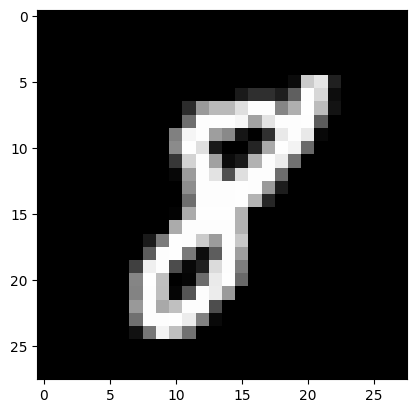

In [5]:
k = 17
y_train[k]
plt.imshow(x_train[k], cmap='gray')

## Discriminator

In [6]:
def discriminator_model(in_shape=(28,28,)):

    img_input = Input(shape=in_shape)
    x = Reshape((28,28,1))(img_input)
    
    x = Conv2D(16, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    
    x = Conv2D(32, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    
    x = Conv2D(64, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Dropout(0.30)(x)
    x = Flatten()(x)
    
    # NOTE: 10 digist one hot encode + to label as fake image
    x = Dense(11, activation='softmax')(x)
    
    model = Model(inputs=img_input, outputs=x)
    
    return model

discriminator = discriminator_model()

discriminator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4640      
                                                             

2023-03-16 05:27:09.965916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-16 05:27:09.965945: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-16 05:27:09.965962: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ds-vm-leandro2): /proc/driver/nvidia/version does not exist
2023-03-16 05:27:09.966154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Generator 

In [7]:
def generator_model(latent_dim = 100):
    
         
    latent_input = Input(shape=(latent_dim,), name='latent_input')
    
    label_input = Input(shape=(1,), name='label_input') # 0...9
    x = Embedding(input_dim=10, output_dim=10)(label_input)
    x = Reshape((10,))(x)
    
    x = concatenate([x, latent_input], axis=-1)

    x = Dense(7*7*128)(x)
    x = LeakyReLU()(x)
    x = Reshape((7,7,128))(x)
        
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = UpSampling2D()(x)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
        
    x = Conv2D(1, kernel_size=3, strides=1, padding='same')(x)
    x = Activation('sigmoid')(x)
        
    x = Reshape((28,28,))(x)
    
    model = Model(inputs=[latent_input, label_input], outputs=x)

    return model


latent_dim = 100 # z size
generator = generator_model(latent_dim)

generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 label_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 10)        100         ['label_input[0][0]']            
                                                                                                  
 reshape_1 (Reshape)            (None, 10)           0           ['embedding[0][0]']              
                                                                                                  
 latent_input (InputLayer)      [(None, 100)]        0           []                               
                                                                                            

# GANS

In [8]:
latent_input = Input(shape=(latent_dim,), name='latent_input')
label_input = Input(shape=(1,), name='label_input')

x = generator([latent_input, label_input])
x = discriminator(x)

gans = Model(inputs=[latent_input, label_input], outputs=x)

discriminator.trainable = False
gans.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 latent_input (InputLayer)      [(None, 100)]        0           []                               
                                                                                                  
 label_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 model_1 (Functional)           (None, 28, 28)       789221      ['latent_input[0][0]',           
                                                                  'label_input[0][0]']            
                                                                                                  
 model (Functional)             (None, 11)           35019       ['model_1[0][0]']          

In [9]:
discriminator.trainable = True
discriminator.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], 
                      optimizer=tf.keras.optimizers.Adam(0.001))

discriminator.trainable = False
gans.compile(loss='sparse_categorical_crossentropy', metrics=['acc'],
            optimizer=tf.keras.optimizers.Adam(0.0003))

# Training and learning curves



In [11]:
!mkdir -p checkpoints
!rm -vf checkpoints/*.h5

removed 'checkpoints/best_generator.h5'
removed 'checkpoints/generator_00000.h5'
removed 'checkpoints/generator_00120.h5'
removed 'checkpoints/generator_00240.h5'
removed 'checkpoints/generator_00360.h5'
removed 'checkpoints/generator_00480.h5'
removed 'checkpoints/generator_00600.h5'
removed 'checkpoints/generator_00720.h5'
removed 'checkpoints/generator_00840.h5'
removed 'checkpoints/generator_00960.h5'
removed 'checkpoints/generator_01080.h5'
removed 'checkpoints/generator_01200.h5'


In [12]:
# Define the checkpoint path and format for saving the generator's weights
checkpoint_path = 'checkpoints/best_generator.h5'

# Define the callback to save the best generator's weights
class SaveBestGenerator(Callback):
    
    def __init__(self, generator):
        
        self.generator = generator
        self.best_loss = np.inf
    
    def on_epoch_end(self, epoch, current_loss = None):
        
        #current_loss = gloss[0] #logs.get('loss')
        if current_loss < self.best_loss:

            self.best_loss = current_loss
            self.generator.save_weights(checkpoint_path)

(1, 28, 28, 1)

(1,)

array([4], dtype=uint8)

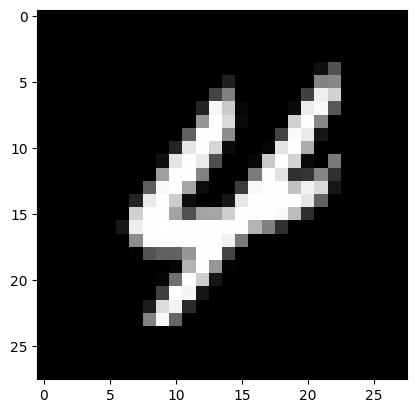

In [13]:
def random_mnist_set(X, y, size=10):
    
    length = len(X)
    indices = np.random.choice(length, size)
    
    return X[indices], y[indices]

def random_generated_set(generator, size=10, latent_dim=100):
    
    # z
    latents = np.random.normal(0, 1, (size, latent_dim))
    
    return generator.predict_on_batch({'latent_input':latents,
                      'label_input':np.random.randint(10, size=size)})

X_i, y_i = random_mnist_set(x_train, y_train, 1)

X_i.shape
y_i.shape

y_i
plt.imshow(X_i[0,:,:,0], cmap='gray')

In [14]:
def gans_train(X, y, discriminator, gans, save_interval,epochs, batch_size, latent_dim ):
    
    history = {'dloss':[], 'gloss':[]}
    save_best_generator = SaveBestGenerator(generator)
    for iteration in range(epochs):

        # train discriminator
        discriminator.trainable = True

        X_sample, y_sample = random_mnist_set(X, y, batch_size)
        dloss_real = discriminator.train_on_batch(X_sample, y_sample)

        # NOTE: GEt random fake image created by the generator
        fake_image = random_generated_set(generator, size=batch_size, latent_dim=latent_dim)
        # NOTE: digit 10 means fake  one_hot_digit.shape = (1,11). If the last elem is the largets it means it is fake
        fake_label = np.full(batch_size, 10)
        dloss_fake = discriminator.train_on_batch(fake_image, fake_label)

        # train generator
        # NOTE: Freeze discriminator parameters
        discriminator.trainable = False

        gan_labels = np.random.randint(10, size=batch_size)
        gloss = gans.train_on_batch({'latent_input':np.random.normal(0, 1, (batch_size, latent_dim)),
                            'label_input':gan_labels}, 
                           gan_labels)

        history['dloss'].append((dloss_real[0]+dloss_fake[0])/2)
        history['gloss'].append(gloss[0])

        if iteration % save_interval == 0:

            print(f'iteration: {iteration}')
            print(f'gan: loss = {gloss[0]:.3f}. acc = { gloss[1]:.3f}')
            print(f'discriminator: loss_real = {dloss_real[0]:.3f}, acc_real = {dloss_real[1]:.3f}')
            print(f'               loss_fake = {dloss_fake[0]:.3f}, acc_fake = {dloss_fake[1]:.3f}')
            generator.save_weights('checkpoints/generator_{0:05d}.h5'.format(iteration))
            
        # Save the best generator's weights
        save_best_generator.on_epoch_end(iteration, gloss[0])
    
    return history

In [15]:
%%time 

save_interval = 15*4*2
epochs = save_interval*10 + 1
batch_size = 20

history = gans_train(x_train, y_train,discriminator, gans, save_interval, epochs, batch_size, latent_dim)

iteration: 0
gan: loss = 2.399. acc = 0.150
discriminator: loss_real = 3.070, acc_real = 0.050
               loss_fake = 3.990, acc_fake = 0.000
iteration: 120
gan: loss = 2.704. acc = 0.050
discriminator: loss_real = 0.453, acc_real = 0.850
               loss_fake = 0.004, acc_fake = 1.000
iteration: 240
gan: loss = 1.164. acc = 0.500
discriminator: loss_real = 0.305, acc_real = 0.900
               loss_fake = 0.008, acc_fake = 1.000
iteration: 360
gan: loss = 1.066. acc = 0.500
discriminator: loss_real = 0.471, acc_real = 0.900
               loss_fake = 0.002, acc_fake = 1.000
iteration: 480
gan: loss = 3.668. acc = 0.150
discriminator: loss_real = 0.172, acc_real = 0.950
               loss_fake = 0.023, acc_fake = 1.000
iteration: 600
gan: loss = 0.263. acc = 0.950
discriminator: loss_real = 0.771, acc_real = 0.750
               loss_fake = 0.000, acc_fake = 1.000
iteration: 720
gan: loss = 0.115. acc = 0.950
discriminator: loss_real = 0.134, acc_real = 0.900
               lo

GANS last 5 values: [0.04166479781270027, 0.14733251929283142, 0.03631981462240219, 0.03727981448173523, 0.05582970380783081]
GANS last 7 mean avg: 0.06098966034395354


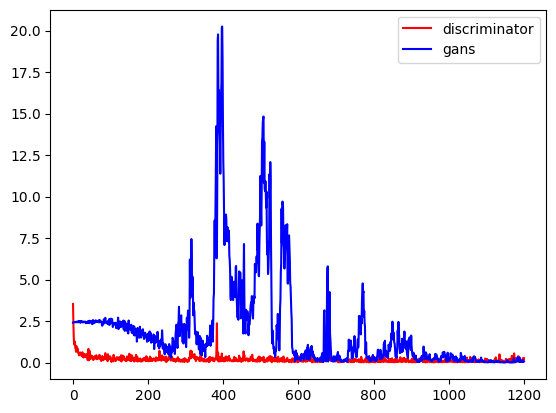

In [16]:
print(f"GANS last 5 values: {history['gloss'][-5:]}")
print(f"GANS last 7 mean avg: {np.mean(history['gloss'][-7:])}")

_ = plt.plot(history['dloss'], 'r')
_ = plt.plot(history['gloss'], 'b')
_ = plt.legend(['discriminator', 'gans'])

<Figure size 1000x2200 with 0 Axes>

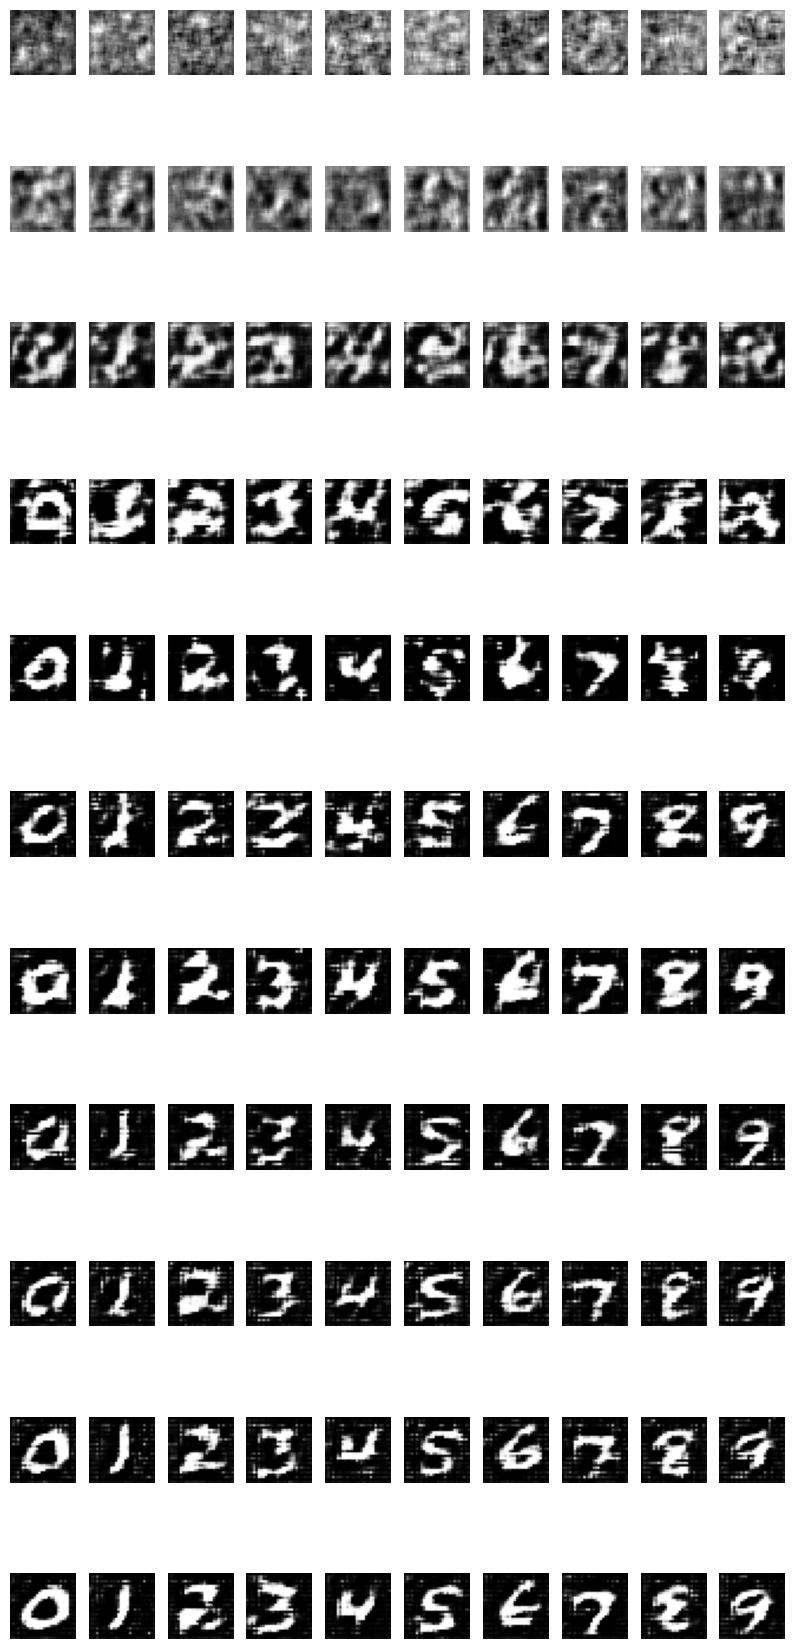

In [17]:
#import seaborn as sns
import glob

checkpoints = sorted(glob.glob('checkpoints/generator_*.h5'))

loaded_generator = generator_model(latent_dim)

plt.figure(figsize=(10,2*len(checkpoints)))
for i,cp in enumerate(checkpoints):
    
    loaded_generator.load_weights(cp)
    
    z = np.random.normal(0, 1, (10, latent_dim))
    digits = np.arange(10)
    
    generated = loaded_generator.predict_on_batch({'latent_input':z,
                      'label_input':digits})
    
    for j, g in enumerate(generated):
        _ = plt.subplot(len(checkpoints),10,10*i+j+1)
        _ = plt.imshow(g, cmap='gray')
        _ = plt.axis('off')

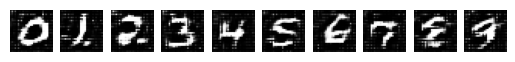

In [18]:
best_generator = generator_model(latent_dim)
best_generator.load_weights('checkpoints/best_generator.h5')

digits = np.arange(10) 
z = np.random.normal(0, 1, (10, latent_dim))

generated = best_generator.predict_on_batch({'latent_input':z,
                      'label_input':digits})

i = 0
for j, g in enumerate(generated):
    _ = plt.subplot(1,10,10*i+j+1)
    _ = plt.imshow(g, cmap='gray')
    _ = plt.axis('off')

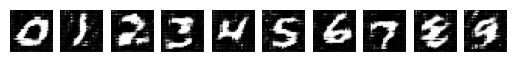

In [19]:
# In memory generator
digits = np.arange(10) 
z = np.random.normal(0, 1, (10, latent_dim))

generated = generator.predict_on_batch({'latent_input':z,
                      'label_input':digits})
i = 0
for j, g in enumerate(generated):
    _ = plt.subplot(1,10,10*i+j+1)
    _ = plt.imshow(g, cmap='gray')
    _ = plt.axis('off')

# Inspecting gans outputs 

In [20]:
fake_image = random_generated_set(generator, size=1, latent_dim=latent_dim)
fake_image.shape

one_hot_digit = discriminator.predict(fake_image, verbose=0)
one_hot_digit.shape

digit_pred = np.argmax(one_hot_digit)
digit_prob = np.max(one_hot_digit)

print(f'predict digit: {digit_pred}; prob: {digit_prob:.2f}')

(1, 28, 28)

(1, 11)

predict digit: 0; prob: 0.61


In [21]:
digit_image, digit = random_mnist_set(x_train, y_train, 1)
digit_image.shape

one_hot_digit = discriminator.predict(digit_image, verbose=0)
one_hot_digit.shape

digit_pred = np.argmax(one_hot_digit)
digit_prob = np.max(one_hot_digit)

print(f'digit: {digit[0]}; predict digit: {digit_pred}; prob: {digit_prob:.2f}')

(1, 28, 28, 1)

(1, 11)

digit: 6; predict digit: 6; prob: 1.00


# Inspecting generator for especifc digit

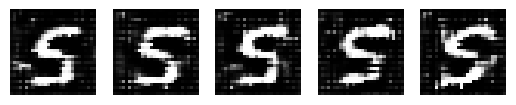

In [23]:
# NOTE: best generator loaded

best_generator = generator_model(latent_dim)
best_generator.load_weights('checkpoints/best_generator.h5')

digit = 5
n_samples = 5

generated = best_generator.predict_on_batch({'latent_input':np.random.normal(0, 1, (n_samples, latent_dim)),
                  'label_input': np.full(n_samples, digit)})

for i, g in enumerate(generated):
        
    _ = plt.subplot(1,n_samples,i+1)
    _ = plt.imshow(g, cmap='gray')
    _ = plt.axis('off')

# The Importance of Balance: Achieving Optimal GAN Performance

The relative speed of learning between the **generator and discriminator** is **critical** in achieve good quality of synthetic data generated by GANs. When the generator learns faster than the discriminator (with discriminator layers having a learning rate much smaller than the GAN's learning rate), the discriminator loss may increase instead of decrease. This makes it easy for the generator to generate poor-quality synthetic data, resulting in data that is similar to noise (see the learning curves below). On the other hand, if the discriminator learns faster than the generator (with GAN's learning rate much smaller than the discriminator's learning rate), the GAN loss may increase, leading to poor synthetic data quality (see the learning curve below). Therefore, it is essential to carefully balance the learning rates of the generator and discriminator to achieve optimal GAN performance.

Learning curve when the generator learns faster than the discriminator:
<img src="images/discrimnator_learn_slowly.png" alt="GANS: discriminator learn slowly">


Learning curve when the discriminator learns faster than the generator:
<img src="images/generator_learn_slowly.png" alt="GANS: generator learn slowly">


Therefore, finding the optimal balance between the generator and discriminator is crucial for successful GAN training. Overall, GANs can be a powerful tools for generating synthetic data, anomaly and outliers detecting, but they require careful attention to training details to achieve optimal performance.

# References

* https://debuggercafe.com/introduction-to-generative-adversarial-networks-gans/ <== looks good
    * https://debuggercafe.com/vanilla-gan-pytorch/ <== short version
* https://towardsdatascience.com/gans-generative-adversarial-networks-an-advanced-solution-for-data-generation-2ac9756a8a99
* https://towardsdatascience.com/fundamentals-of-generative-adversarial-networks-b7ca8c34f0bc#:~:text=What%20are%20GANs%2C%20and%20what,photos%20of%20more%20handwritten%20digits.
* https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29
* https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/
* https://arxiv.org/pdf/1406.2661.pdf <== paper
*  https://mafda.medium.com/gans-generative-adversarial-network-with-mnist-part-db8b9c061de0
* https://www.safwan.xyz/Vanilla-GAN/ <= with the algo in pseud code
* https://www.kaggle.com/code/zhoulingyan0228/generating-mnist-gan
